### Libraries import

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import circlify
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### Style

In [17]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [18]:
dataset = pd.read_csv('./../data/fuoriuscita/utenti_1522/Tipologia di utenza (2013 - 2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,Sesso,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2013,2013,50.68,NaN,NaN
1,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2014,2014,55.63,NaN,NaN
2,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2015,2015,54.22,NaN,NaN
3,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2016,2016,55.11,NaN,NaN
4,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,ALL_VAL,chiamate valide,T,totale,2017,2017,52.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2018,2018,55.63,NaN,NaN
96,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2019,2019,48.40,NaN,NaN
97,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2020,2020,68.08,NaN,NaN
98,IT,Italia,USERS_TYPE,utenti del 1522 per tipologia di utenza(compos...,USERS_CAL,utenti che chiamano per sè,T,totale,2021,2021,60.60,NaN,NaN


Ottenimento dati nazionali ed eliminazione di dati inutili e/o ridondanti:

In [19]:
country_data = dataset[dataset['ITTER107'] == 'IT'] # ottiene solo dati nazionali

# rimozione di:
# - "Seleziona periodo" e "Sesso" che contengono dati ridondanti rispettivamente di "TIME" e "SEXISTAT1"
# - "ITTER107" e "Territorio" in quanto non vi è più alcuna distinzione, i dati mantenuti sono tutti nazionali
# - "Flag Codes" e "Flags" in quanto inutili
# - "TIPO_DATO_1522" e "Tipo dato" in quanto non utilizzati e ridondanti
# - "SEXISTAT1" in quanto i dati non presentano dist
country_data = country_data.drop(columns=['Seleziona periodo', 'Sesso', 'Flag Codes', 'Flags', 'Territorio', 'ITTER107', 'TIPO_DATO_1522', 'Tipo dato'])

country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
0,ALL_VAL,chiamate valide,T,2013,50.68
1,ALL_VAL,chiamate valide,T,2014,55.63
2,ALL_VAL,chiamate valide,T,2015,54.22
3,ALL_VAL,chiamate valide,T,2016,55.11
4,ALL_VAL,chiamate valide,T,2017,52.30
...,...,...,...,...,...
95,USERS_CAL,utenti che chiamano per sè,T,2018,55.63
96,USERS_CAL,utenti che chiamano per sè,T,2019,48.40
97,USERS_CAL,utenti che chiamano per sè,T,2020,68.08
98,USERS_CAL,utenti che chiamano per sè,T,2021,60.60


Rimozione dei dati totali (aggregati) o non definiti per la tipologia dell'utenza e ritenzione solo dei più recenti (2022):

In [20]:
country_data = country_data[(country_data["TIPUTENZA2"] != 'ALL_VAL') & (country_data["TIME"] == 2022)]

country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
19,OPERATORS,da operatori,T,2022,1.21
29,FRIEND_ACQU,da parenti/amici/conoscenti,T,2022,2.26
39,OTH_VALID,altre chiamate valide,T,2022,0.51
49,ERROR,chiamate errate,T,2022,36.62
59,STLK,molestatori,T,2022,6.02
69,JOKE,per motivi non pertinenti (scherzi),T,2022,0.46
79,WRONG_NUM,per numero errato,T,2022,30.13
89,TOT,totale,T,2022,100.00
99,USERS_CAL,utenti che chiamano per sè,T,2022,59.41


Rimozione dato aggregato del totale:

In [21]:
country_data = country_data[country_data['TIPUTENZA2'] != 'TOT']
country_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value
19,OPERATORS,da operatori,T,2022,1.21
29,FRIEND_ACQU,da parenti/amici/conoscenti,T,2022,2.26
39,OTH_VALID,altre chiamate valide,T,2022,0.51
49,ERROR,chiamate errate,T,2022,36.62
59,STLK,molestatori,T,2022,6.02
69,JOKE,per motivi non pertinenti (scherzi),T,2022,0.46
79,WRONG_NUM,per numero errato,T,2022,30.13
99,USERS_CAL,utenti che chiamano per sè,T,2022,59.41


### Plot

Sorting dei dati:

In [22]:
# crea un nuovo dataframe per evitare i warning relativi al fatto che si modifica una 
# porzione di un dataframe più grosso
plt_data = country_data.copy()

# sorta i record del dataframe in base al valore in maniera decrescente
plt_data.sort_values(by=['Value'], inplace=True, ascending=False)

# aggiunge due colonne al dataframe per istruire la costruzione dello scatterplot
# tutti i cerchi sono sulla stessa Y 
# sull'asse x sono ordinati in base al valore
plt_data['Y'] = [1]*len(plt_data)
list_x = list(range(0, len(plt_data)))
plt_data['X'] = list_x

plt_data

,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,TIME,Value,Y,X
99,USERS_CAL,utenti che chiamano per sè,T,2022,59.41,1,0
49,ERROR,chiamate errate,T,2022,36.62,1,1
79,WRONG_NUM,per numero errato,T,2022,30.13,1,2
59,STLK,molestatori,T,2022,6.02,1,3
29,FRIEND_ACQU,da parenti/amici/conoscenti,T,2022,2.26,1,4
19,OPERATORS,da operatori,T,2022,1.21,1,5
39,OTH_VALID,altre chiamate valide,T,2022,0.51,1,6
69,JOKE,per motivi non pertinenti (scherzi),T,2022,0.46,1,7


Definizione della palette colori:

In [23]:
palette = ["#F7DEE5", "#EEC1D2", "#D791B5", "#C4679B", "#AC4187", "#7D275C", "#481437"]
# palette.reverse() # a seconda se si vuole il più grande più scuro o viceversa

Primo plot di verifica tramite plotly per avere visione più chiara (cerchi in fila):

In [24]:
label = ['<br>' + str(i) + '<br>' + str(j) + '%' for i,j in 
         zip(country_data['Tipologia di utenza'], country_data['Value'])]

fig = px.scatter(plt_data, x='X', y='Y', color='Tipologia di utenza', color_discrete_sequence=palette, 
                 size='Value', text=label, size_max=90)

fig.update_layout(width=900, height=320, margin=dict(t=50, l=0, r=0, b=0), showlegend=False)
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white','paper_bgcolor': 'white'})
fig.show()

Plot definitivo:

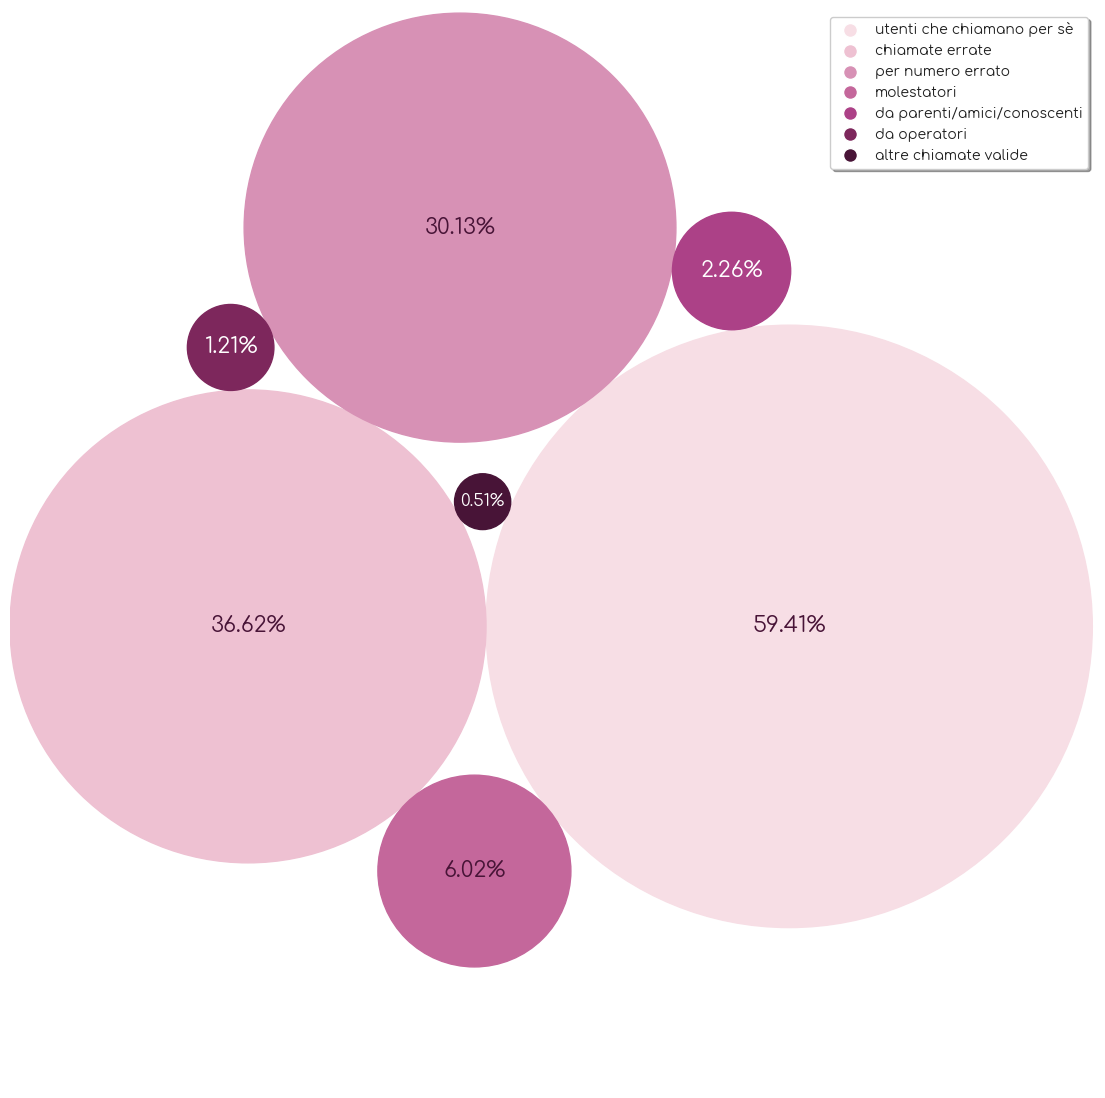

In [25]:
# label del grafico, contengono solo la percentuale,la relativa categoria sarà nella label
labels = [str(percentage) + '%' for percentage in plt_data['Value']]

# calcolo posizioni delle bolle
circles = circlify.circlify(plt_data['Value'].tolist(), show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0))
circles.reverse()

# plot
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

ax.axis('off') # rimozione assi

lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# idx -> indice del cerchio corrente
# circle -> cerchio corrente
# percentage -> stringa che contiene la percentuale del cerchio
# color -> colore corrente (da usare per il cerchio) preso dalla palette
for idx, circle, percentage, color in zip(range(0, len(labels)), circles, labels, palette):
    x, y, r = circle # informazioni cerchio
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color=color)) # colorazione cerchio

    # selezione del colore del font in modo che sia a contrasto col colore del cerchio
    font_color = 'white' if idx > 3 else palette[-1]
    # selezione della dimensione della label in base alla dimensione del cerchio
    font_size = 16 if r > 0.06 else 12

    # impostazione della label
    plt.annotate(percentage, (x,y), size=font_size, color=font_color, va='center', ha='center')

# legenda custom
legend_circles = [Line2D([], [], color='white', marker='o', markersize=10, markerfacecolor=x) for x in palette]
legend_labels = [x for x in plt_data['Tipologia di utenza'].values]
plt.legend(legend_circles, legend_labels)

plt.xticks([])
plt.yticks([])

plt.show()